# CS-UY 3943 - Introduction of Data Science
## Week 5: Linear Regression

Please edit the cell below to add your name, NetID, assigned group, and group members for this assignment. **Complete this section before proceeding to the assignment questions.**

Name:  Thomas Scarola
NetID:  tws285
Group (Letter):  H
Group Member 1:  Kevin Zheng
Group Member 2:  
***

### Introduction
Returning to the home sale prices dataset from the previous assignment, consider the goal of building a model that can use characteristics of a home to predict the price for which it will sell. The dataset has been modified so that the target value is the price (in dollars) per square foot (sq. ft.) for each home instead of the raw sale price for each home. The data consists of 81 total features for each home and 1,460 home sales in the dataset. Your goal for this assignment is to choose the feature that best predicts the price per square foot of a home from the 80 available predictive features. The 81 original features are described in the document **data_description.txt** provided in your repo. The file **housing_data_mod.csv** contains the field `PricePerSqFt` in place of `SalePrice`. The square foot value used to calculate this value is the sum of the values of the following features: `TotalBsmtSF`, `1stFlrSF`, `2ndFlrSF`, `WoodDeckSF`, and `OpenPorchSF`.

1\. Read in the data contained in the file **housing_data_mod.csv** as a `pandas DataFrame`. Imagine that you only have the ability to select one of the 80 features to use for predicting the price of a home (represented as the price per sq. ft.). Which one of the features would you select and why? (Be sure to include code providing data and/or visualizations to justify your choice).

(array([1.423e+03, 2.400e+01, 8.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([  1300. ,  22694.5,  44089. ,  65483.5,  86878. , 108272.5,
        129667. , 151061.5, 172456. , 193850.5, 215245. ]),
 <BarContainer object of 10 artists>)

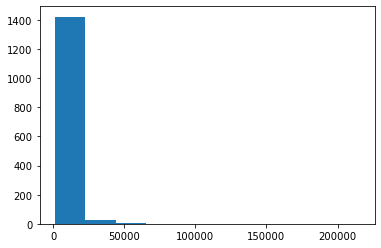

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Place your code here
LArea = pd.read_csv("housing_data_mod.csv")
plt.hist(LArea["LotArea"])

<p>
<span style="color:blue">
LotArea, property size is a good indication as to how much a house is going to cost as you more often pay for the property than the house itself.
</span>
</p>

2\. Make a scatter plot for the chosen feature to visually explore the relationship between your chosen feature and `PricePerSqFt`. Place the chosen feature on the x-axis and the sale price per sq. ft. on the y-axis. Don't forget to label your axes and give the plot a title.

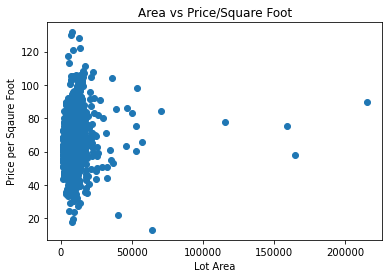

In [15]:
# Place your code here
plt.scatter(LArea["LotArea"], LArea["PricePerSqFt"])
plt.xlabel("Lot Area")
plt.ylabel("Price per Sqaure Foot")
plt.title("Area vs Price/Square Foot")
plt.show()

3\. Estimate the parameters of a least-squares linear regression model (slope and intercept) using the feature selected in Question 1 to predict the price per sq. ft. of a home in the market. 
* Output the estimated slope and intercept of the model
* Plot the model's trend line on a scatter plot of the features as constructed in Question 2
* Using simple language, explain what the model says about the relationship between the chosen feature and the price per square foot of a home in the market

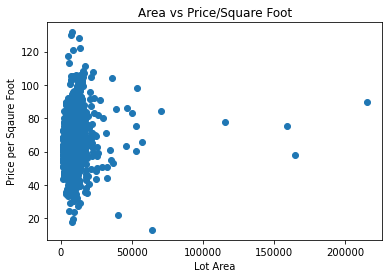

In [43]:
# Place your code here
from statsmodels.formula.api import ols
model_fit = ols(formula="LotArea ~ PricePerSqFt", data=LArea)
model_fit = model_fit.fit()

a0 = model_fit.params['Intercept']
a1 = model_fit.params['PricePerSqFt']

plt.scatter(LArea["LotArea"], LArea["PricePerSqFt"])

plt.xlabel("Lot Area")
plt.ylabel("Price per Sqaure Foot")
plt.title("Area vs Price/Square Foot")
plt.show()

<p>
<span style="color:blue">
Explain model here
</span>
</p>

4\. While visualizing the relationship between the features is helpful, using a statistical test can determine if the relationship is due to random chance or actually exists. Before performing the statistical test, begin by exploring how the data might change if repeating the sale of homes (sampling) from the same population of homes on the market. For this question complete the following steps:

* Generate 10,000 bootstrap replicates of the slope and intercept for your chosen feature and the price per sq. ft. 
* Plot the distribution of bootstrap slope and intercept replicates on separate plots
* Plot the first 200 lines formed by the bootstrap replicates for the slope and intercept on a scatter plot to visualize the variability in the replicates

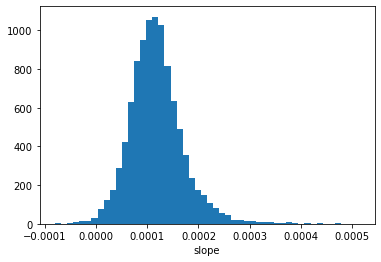

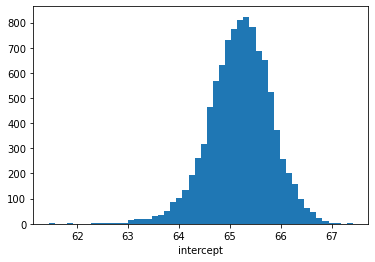

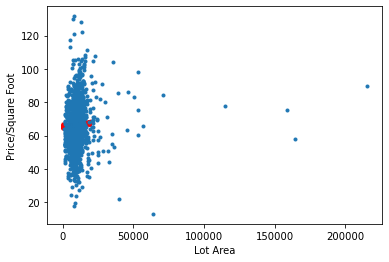

In [60]:
def draw_bs_pairs_linreg(x, y, size=1):

    inds = np.arange(len(x))

    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(
                    LArea["LotArea"], LArea["PricePerSqFt"], size=10000)

_ = plt.hist(bs_slope_reps, bins=50)
_ = plt.xlabel('slope')
plt.show()

_ = plt.hist(bs_intercept_reps, bins=50)
_ = plt.xlabel('intercept')
plt.show()

x = np.array([0, 20000])
for i in range(200):
    _ = plt.plot(x, 
                 bs_slope_reps[i] * x + bs_intercept_reps[i], color='red')
    
_ = plt.plot(LArea["LotArea"], LArea["PricePerSqFt"], marker='.', linestyle='none')
_ = plt.xlabel('Lot Area')
_ = plt.ylabel('Price/Square Foot')
plt.show()

5\. Develop a hypothesis test for the strength of the relationship between the selected feature and a homes price per sq. ft. Recall the steps required for defining and executing a hypothesis test:

* State the null hypothesis
* Define a test statistic
* Generate many data sets assuming the null hypothesis is true
* Compute the test statistic for each data set
* Compute a p-value as the fraction of the simulated data sets with a test statistic as extreme as the one observed
* Evaluate how likely the null hypothesis is given the calculated p-value

<p>
<span style="color:blue">
Lot Area and Price per Square Foot are not correlated
</span>
</p>

<p>
<span style="color:blue">
Pearson r
</span>
</p>

In [54]:
# Place code here for executing hypothesis test
def pearson_r(x, y):
    corr_mat = np.corrcoef(x, y)

    return corr_mat[0,1]

r_obs = pearson_r(LArea["LotArea"], LArea["PricePerSqFt"])

perm_replicates = np.empty(10000)

for i in range(10000):
    LotArea_permuted = np.random.permutation(LArea["LotArea"])

    perm_replicates[i] = pearson_r(LotArea_permuted, LArea["PricePerSqFt"])

p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0032


<p>
<span style="color:blue">
Our null hypothesis was incorrect, as shown by the small p-value, indicating that there is a relationship between Lot Area and Price per Square Foot.
</span>
</p>

6\. Goodness of fit statistics allow for the evaluation of how well a model fits observed data. To determine how well a model using the chosen feature predicts the price per square foot for a home, calculate and output the root mean-squared error (RMSE) and R^2 statistics for the model.  

For RMSE:
* use the slope and intercept estimated previously to calculate the predicted price per square foot
* calculate the residuals between the predicted model and observed values
* use the calculated residuals to compute the RMSE without using a function provided in a Python package  

For R^2:
* calculate the variance in the price per square foot
* calculate the variance in the residuals
* use the two variance values to compute R^2 without using a function provided in a Python package

What do the values of these statistics indicate about the appropriateness of the model for predicting the price per square foot for homes in the market?

In [67]:
# Place code here
residuals = a1 - LArea["PricePerSqFt"]

RSS = np.sum(np.square(residuals))
MSE = RSS/len(residuals)
RMSE = np.sqrt(MSE)
print('RMSE = {:0.2f}, MSE = {:0.2f}, RSS = {:0.2f}'.format(RMSE, MSE, RSS))

deviations = np.mean(LArea["PricePerSqFt"]) - LArea["PricePerSqFt"]

var_residuals = np.mean(np.square(residuals))
var_deviations = np.mean(np.square(deviations))

r_squared = 1 - (var_residuals / var_deviations)
print('R-squared is {:0.2f}'.format(r_squared))

RMSE = 19.42, MSE = 377.25, RSS = 550785.01
R-squared is -0.83


<p>
<span style="color:blue">
R squared is probably not a good predictor for the price per square foot as it resulted in a very low value
</span>
</p>